/home/anton/source/torch-env/lib/python3.12/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

Both `num_inference_steps`: 1 and `timesteps`: [0] are supplied; `timesteps` will be used over `num_inference_steps`.


  0%|          | 0/1 [00:00<?, ?it/s]

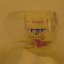

In [1]:
import torch
from diffusers import ConsistencyModelPipeline

device = "cuda"
model_id_or_path = "openai/diffusers-cd_imagenet64_l2"
pipe = ConsistencyModelPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)
pipe.to(device)

#pipe.unet = torch.compile(pipe.unet, mode="reduce-overhead", fullgraph=True)

# Multistep sampling
# Timesteps can be explicitly specified; the particular timesteps below are from the original GitHub repo:
# https://github.com/openai/consistency_models/blob/main/scripts/launch.sh#L83
image = pipe(timesteps=[0]).images[0]
image

## Consistency Model Pipeline

In [2]:
generator = torch.Generator(device=device)

In [3]:
generator.device.type

'cuda'

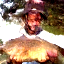

In [4]:
timesteps = [0]
generator = None
with torch.no_grad():
    batch_size=1
    img_size=pipe.unet.config.sample_size
    
    sample = pipe.prepare_latents(
                batch_size=batch_size,
                num_channels=pipe.unet.config.in_channels,
                height=img_size,
                width=img_size,
                dtype=pipe.unet.dtype,
                device=device,
                generator=generator,
                latents=None,
            )
    
    
    pipe.scheduler.set_timesteps(timesteps=timesteps, device=device)
    timesteps = pipe.scheduler.timesteps

    
    for t in timesteps:
        
        scaled_sample = pipe.scheduler.scale_model_input(sample, t)
        model_output = pipe.unet(
            scaled_sample, 
            t, 
            class_labels=torch.tensor([0], device=device), 
            return_dict=False
        )[0]

        output = pipe.postprocess_image(model_output)
    
        sample = pipe.scheduler.step(model_output, t, sample, generator=generator)[0]
    
    image = pipe.postprocess_image(sample)

output[0]

In [7]:
pipe.scheduler._step_index -= 1 

In [6]:
pipe.scheduler.step(model_output, t, sample, generator=generator)[0]

tensor([[[[ 0.5747,  0.3823,  0.2981,  ..., -0.2471, -0.3193, -0.3069],
          [ 0.7217,  0.8101,  0.5469,  ..., -0.4089, -0.3960, -0.3694],
          [ 0.9189,  0.6763,  0.6553,  ..., -0.4626, -0.4558, -0.4331],
          ...,
          [ 0.3757,  0.3228,  0.4224,  ..., -0.1214,  0.0170,  0.1797],
          [ 0.4290,  0.5234,  0.3613,  ..., -0.1591, -0.0028,  0.0155],
          [ 0.5386,  0.1702, -0.0349,  ..., -0.1965, -0.1207, -0.0722]],

         [[ 0.6973,  0.5400,  0.4333,  ..., -0.3662, -0.4346, -0.4302],
          [ 0.8027,  0.8809,  0.5864,  ..., -0.4885, -0.4810, -0.4846],
          [ 0.9678,  0.7007,  0.7007,  ..., -0.5288, -0.5156, -0.5488],
          ...,
          [ 0.2495,  0.2063,  0.2920,  ..., -0.1862, -0.0348,  0.1165],
          [ 0.2886,  0.3882,  0.2576,  ..., -0.2410, -0.0662, -0.0381],
          [ 0.4585,  0.0826, -0.0661,  ..., -0.2527, -0.1704, -0.0867]],

         [[ 0.7368,  0.6201,  0.4944,  ..., -0.3638, -0.4138, -0.3760],
          [ 0.8408,  0.8979,  

## yo

In [18]:
timesteps=list(reversed(range(40)))
pipe.scheduler.set_timesteps(timesteps=timesteps, device=device)
timesteps = pipe.scheduler.timesteps

noise=torch.randn(size=sample.shape).to(device)

In [21]:
out = pipe.scheduler.add_noise(sample, noise=noise, timesteps=timesteps)

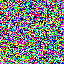

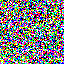

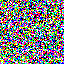

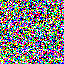

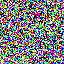

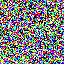

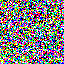

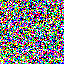

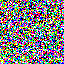

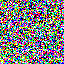

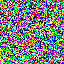

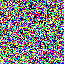

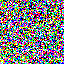

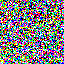

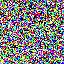

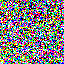

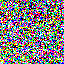

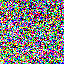

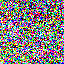

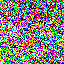

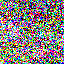

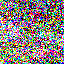

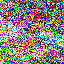

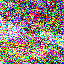

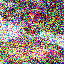

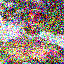

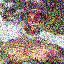

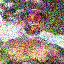

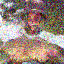

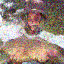

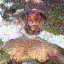

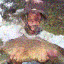

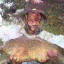

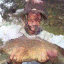

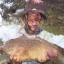

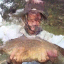

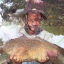

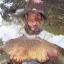

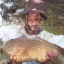

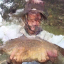

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [30]:
imgs = pipe.postprocess_image(out)
[display(img) for img in imgs]